# **Support Vector Machine**

1.   **SVM (Support Vector Machine)** is a supervised ML algorithm used for classification (mostly) and also regression.
2.   SVM tries to find a best separating boundary **(hyperplane)** between classes such that the margin between the classes is maximum.
3.   A ***hyperplane*** is just a line (in 2D), a plane (in 3D), or a boundary in higher dimensions.
4.   ***Support Vectors*** are the data points which lie nearest to the hyperplane. If these data points changes, the position of the hyperplane changes.
5.   ***Margin*** is the distance between the hyperplane and the nearest data points from each class.

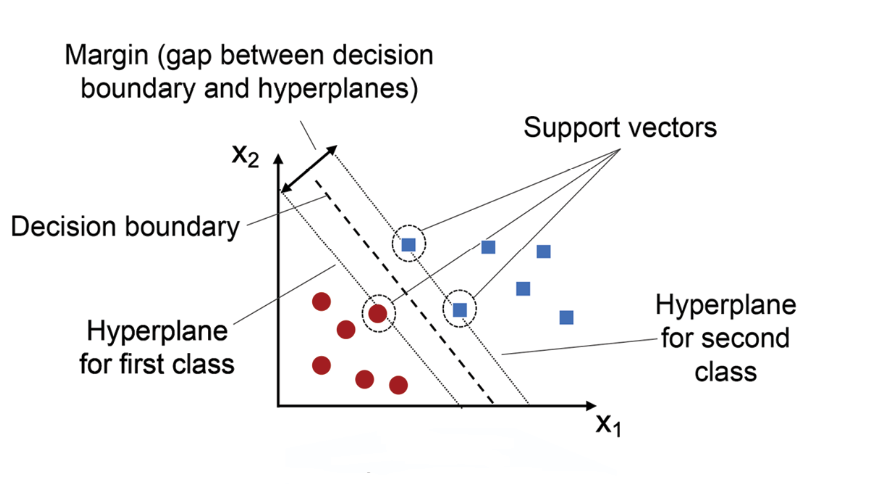

> ***SVM Kernel:***
Kernel Function generally transforms the training set of data so that a non-linear decision surface can be transformed to a linear equation in a higher number of dimension spaces.
It returns the inner product between two points in a standard feature dimension.

**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Implementation**

In [2]:
class SVM_Classifier:
    # Constructor to initiate model hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    # fitting the dataset to SVM Classifier
    def fit(self, X, Y):
        # Number of training examples (m) and number of input features (n)
        self.m, self.n = X.shape

        # Initialize weights and bias value
        self.w = np.zeros(self.n)
        self.b = 0

        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_weights()

    # Function for updating weights and bias value
    def update_weights(self):
        y_label = np.where(self.Y <= 0, -1, 1)

        for index, x_i in enumerate(self.X):
            condition = (y_label[index] * (np.dot(x_i, self.w) - self.b)) >= 1

            if condition == True:
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]

            # Update the weights and bias using formula
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    # predict the label for a given input feature(s)
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_pred = np.where(predicted_labels <= -1, 0, 1)
        return y_pred

**Training the SVM Classifier model on Training Dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Data Preprocessing**

In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [11]:
X = df.drop(columns="Outcome", axis=1)
Y = df["Outcome"]

**Data Standardization**

In [12]:
scaler = StandardScaler()
std_data = scaler.fit_transform(X)

In [13]:
print(std_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
X = std_data
Y = df["Outcome"]

**Training Testing Dataset Splitting**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=23)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (652, 8) (116, 8)


**Model Training**

In [17]:
classifier = SVM_Classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.001)

In [18]:
classifier.fit(X_train, Y_train)

**Model Accuracy Evaluation on Training Dataset**

In [19]:
Y_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)
print(f"Accuracy on training data: {training_data_accuracy:.2%}")

Accuracy on training data: 77.91%


**Model Accuracy Evaluation on Testing Dataset**

In [20]:
Y_test_pred = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test_pred, Y_test)
print(f"Accuracy on testing data: {testing_data_accuracy:.2%}")

Accuracy on testing data: 77.59%


**Making a Predictive System**

In [21]:
input_data = (9,123,70,44,94,33.1,0.374,40)
feature_names = df.drop(columns='Outcome', axis=1).columns

input_data = pd.DataFrame([input_data], columns=feature_names)
input_data = scaler.transform(input_data)

prediction = classifier.predict(input_data)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is not diabetic
